Imoprt libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/hp/Desktop/DS/bmi.csv")

Load the data

In [4]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [6]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


Import some dependencies from sklearn

In [7]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [8]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


Change the gender to be categorical ie in 0 and 1using labelencoder

In [11]:
gender=LabelEncoder()
data['Gender']=gender.fit_transform(data['Gender'])

In [13]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [14]:
bins=(-1,0,1,2,3,4,5)
health=['malnourished','underweight','fit','slightly overweight','overweight','extremely overweight']
data['Index']=pd.cut(data['Index'],bins=bins,labels=health)

In [15]:
data['Index']

0                overweight
1                       fit
2                overweight
3       slightly overweight
4       slightly overweight
               ...         
495    extremely overweight
496              overweight
497    extremely overweight
498    extremely overweight
499    extremely overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < 'slightly overweight' < 'overweight' < 'extremely overweight']

To get the count

In [16]:
data['Index'].value_counts()

Index
extremely overweight    198
overweight              130
fit                      69
slightly overweight      68
underweight              22
malnourished             13
Name: count, dtype: int64

In [17]:
data['Gender'].value_counts()

Gender
0    255
1    245
Name: count, dtype: int64

To make a countplot

<Axes: ylabel='count'>

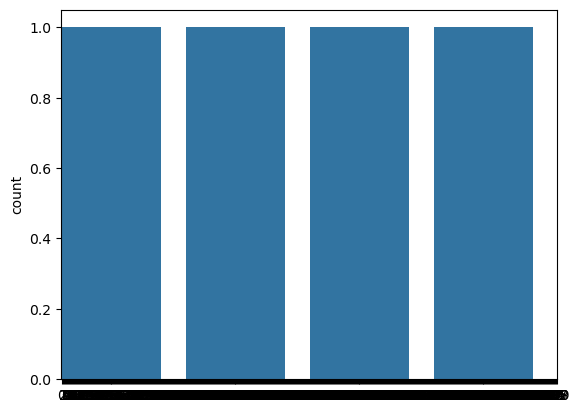

In [23]:
sns.countplot(data['Gender'])

<Axes: xlabel='count', ylabel='Index'>

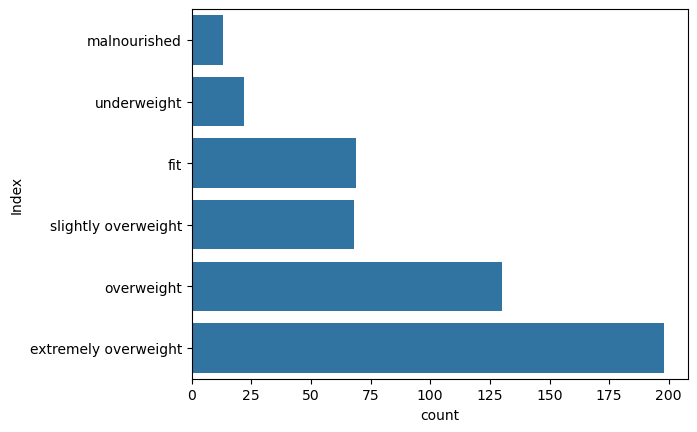

In [19]:
sns.countplot(data['Index'])

Relation plot

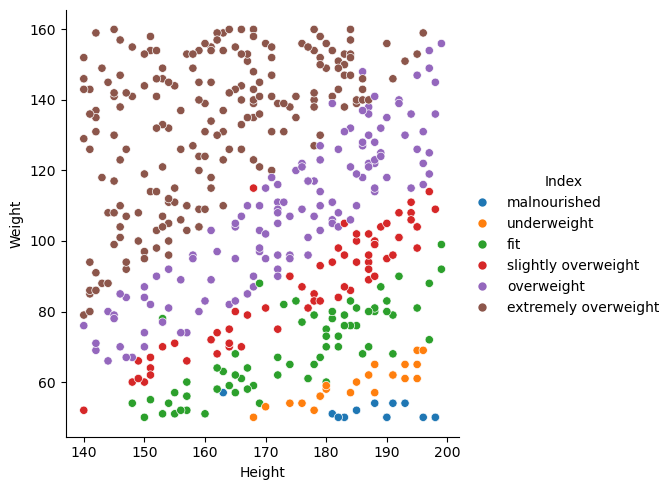

In [20]:
sns.relplot(x='Height',y='Weight',hue='Index',data=data)

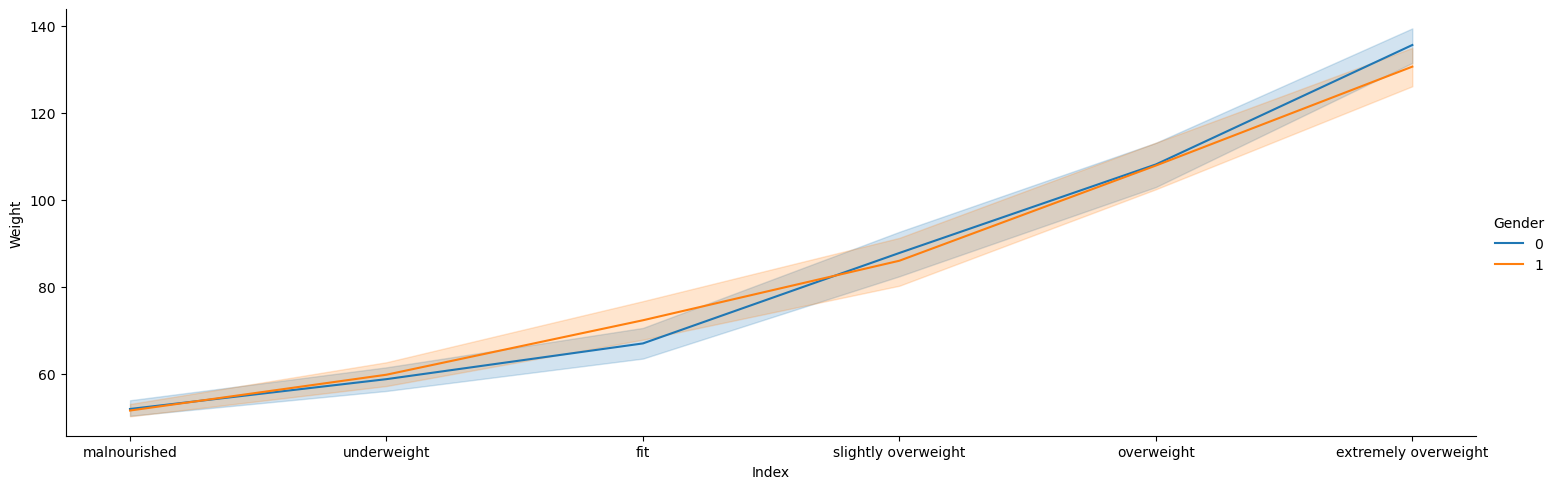

In [26]:
sns.relplot(x='Index',y='Weight',hue='Gender',kind='line',data=data,height=5,aspect=3)

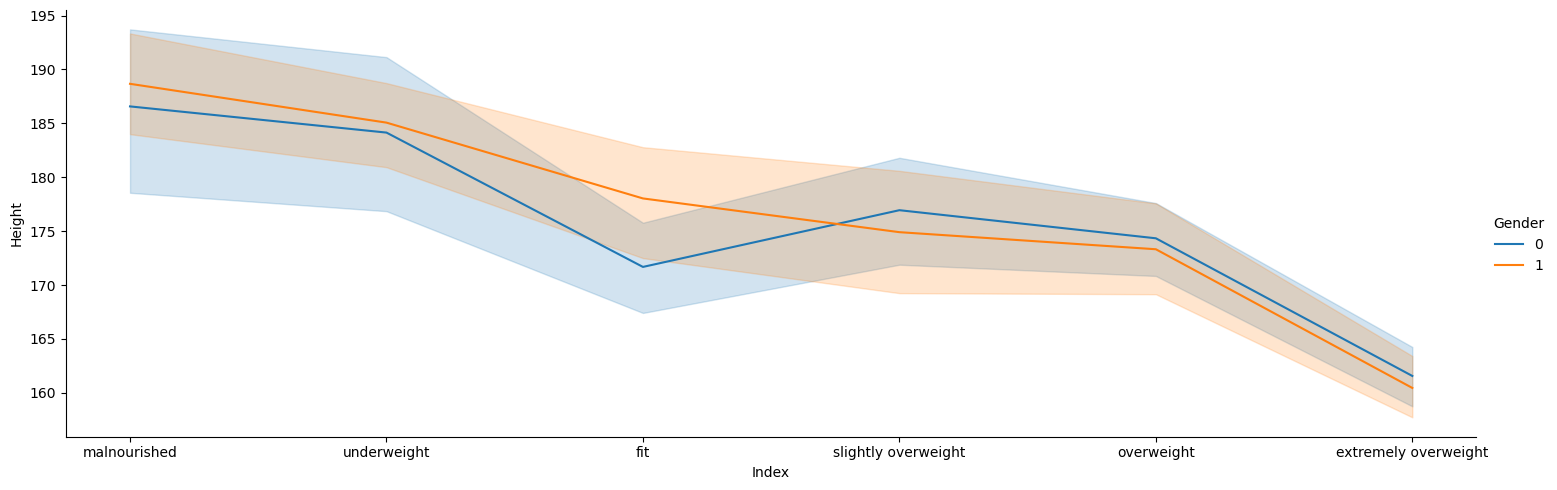

In [27]:
sns.relplot(x='Index',y='Height',hue='Gender',kind='line',data=data,height=5,aspect=3)

To predict the body mass index

In [29]:
x=data.drop('Index',axis=1)
y=data['Index']  #Here, x is training data and y is test data

Use train_test_split to split the arrays or matrices into random train and test subsets

In [30]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [32]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [34]:
print(classification_report(y_test,pred, zero_division=0))

                      precision    recall  f1-score   support

extremely overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       0.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
 slightly overweight       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



In [35]:
print(confusion_matrix(y_test,pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


Checking accuracy

In [36]:
print(accuracy_score(y_test,pred))

0.85


Test the classifier for a new value

In [42]:
a=[[0,185,110]]
a=s.transform(a)
b=clf.predict(a)

C:\Users\hp\anaconda3\envs\YT-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
b

array(['overweight'], dtype=object)

In [44]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
...,...,...,...,...
495,0,150,153,extremely overweight
496,0,184,121,overweight
497,0,141,136,extremely overweight
498,1,150,95,extremely overweight
